# 수집한 데이터 불러오기

구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences





파일 불러오기 후 데이터 전반적으로 살펴보기

In [3]:
df = pd.read_csv('/content/drive/MyDrive/보이스피싱/combined_dataset.csv')
# 헤더 출력
print(df.head())


   num                                         transcript  label
0    1  예 고객님 담당자 김성도 대리입니다.\n예\n지금 법무사님이 두분 배정되셨어요.\n...      1
1    2  본인 성함 알겟습니다. 제가 첫번째는 이제 본인이 혹시라도 이제 깡통 계좌 발생으로...      1
2    3  6시 되가지고 전화 해봤습니다.\n예 예 그 앞전에 이면주 법무사님 영수증 확인되셨...      1
3    4  네 네 네 여보세요\n네 네\n어디에 계시는 겁니까 지금\n네?\n지금 어디 계시는...      1
4    5  네 여보세요.\n네 여보세요? 네 OOO 고객님 맞으시죠?\n네 맞아요.\n네 고객...      1


열 제목 수정, num 열 삭제, 문자열로 타입 변환

In [4]:
df.columns = ['num', 'transcript', 'label']

del df['num']

new_df = df
new_df['transcript'] = new_df['transcript'].astype('string')

new_df.head()

,transcript,label
0,예 고객님 담당자 김성도 대리입니다. 예 지금 법무사님이 두분 배정되셨어요. 네 네...,1
1,본인 성함 알겟습니다. 제가 첫번째는 이제 본인이 혹시라도 이제 깡통 계좌 발생으로...,1
2,6시 되가지고 전화 해봤습니다. 예 예 그 앞전에 이면주 법무사님 영수증 확인되셨는...,1
3,네 네 네 여보세요 네 네 어디에 계시는 겁니까 지금 네? 지금 어디 계시는 거예요...,1
4,네 여보세요. 네 여보세요? 네 OOO 고객님 맞으시죠? 네 맞아요. 네 고객님 안...,1


In [5]:
df_unique = new_df.drop_duplicates(subset=['transcript'], keep = 'first')

transcript = df_unique['transcript']
print('전체 데이터 개수:',len(transcript))
print(transcript.nunique(),df_unique['label'].nunique())

transcript

new_df = df_unique
new_df

전체 데이터 개수: 6344
6343 2


,transcript,label
0,예 고객님 담당자 김성도 대리입니다. 예 지금 법무사님이 두분 배정되셨어요. 네 네...,1
1,본인 성함 알겟습니다. 제가 첫번째는 이제 본인이 혹시라도 이제 깡통 계좌 발생으로...,1
2,6시 되가지고 전화 해봤습니다. 예 예 그 앞전에 이면주 법무사님 영수증 확인되셨는...,1
3,네 네 네 여보세요 네 네 어디에 계시는 겁니까 지금 네? 지금 어디 계시는 거예요...,1
4,네 여보세요. 네 여보세요? 네 OOO 고객님 맞으시죠? 네 맞아요. 네 고객님 안...,1
...,...,...
6796,요새 먹거리에 대해 코로나 때문에 그런지 더 관심이 많아지는 거 같아요. 특히 집에...,0
6797,어~ 중학생 때부터 좋아하던 배우가 있는데 어~ 이제 요즘 영화나 드라마 같은 데는...,0
6798,오늘은 꿈에 대해서 한번 이야기를 나눠 보았으면 좋겠어요. 음~ 나는 어렸을 때부터...,0
6799,저는 여러 계절이 있지만 겨울 이라는 계절을 제일 좋아하는데요. 가장 큰 이유 중의...,0


결측값 처리

In [6]:
new_df = new_df.dropna()

new_df.isnull().values.any()
new_df

,transcript,label
0,예 고객님 담당자 김성도 대리입니다. 예 지금 법무사님이 두분 배정되셨어요. 네 네...,1
1,본인 성함 알겟습니다. 제가 첫번째는 이제 본인이 혹시라도 이제 깡통 계좌 발생으로...,1
2,6시 되가지고 전화 해봤습니다. 예 예 그 앞전에 이면주 법무사님 영수증 확인되셨는...,1
3,네 네 네 여보세요 네 네 어디에 계시는 겁니까 지금 네? 지금 어디 계시는 거예요...,1
4,네 여보세요. 네 여보세요? 네 OOO 고객님 맞으시죠? 네 맞아요. 네 고객님 안...,1
...,...,...
6796,요새 먹거리에 대해 코로나 때문에 그런지 더 관심이 많아지는 거 같아요. 특히 집에...,0
6797,어~ 중학생 때부터 좋아하던 배우가 있는데 어~ 이제 요즘 영화나 드라마 같은 데는...,0
6798,오늘은 꿈에 대해서 한번 이야기를 나눠 보았으면 좋겠어요. 음~ 나는 어렸을 때부터...,0
6799,저는 여러 계절이 있지만 겨울 이라는 계절을 제일 좋아하는데요. 가장 큰 이유 중의...,0


# 데이터 증강
문장 조합을 이용해서 데이터 갯수를 늘리고 다양한 길이의 문장 데이터를 이용.

In [7]:
import pandas as pd
from itertools import combinations

# 라벨 별로 균형잡힌 샘플링을 위한 함수 정의
def balanced_sampling(df, n_samples_per_label):
    sampled_dfs = [sub_df.sample(n=n_samples_per_label, random_state=42)
                   for label, sub_df in df.groupby('label')]
    return pd.concat(sampled_dfs).reset_index(drop=True)

# 라벨 별로 균형잡힌 샘플링 수행
balanced_df = new_df

# 문장 분리 함수 정의
def split_into_sentences(text):
    sentences = text.split('.')
    return [sentence.strip() for sentence in sentences if sentence]

# 문장 조합 생성 함수 정의 - 각 라벨 별 최대 조합 개수 적용
def generate_sentence_combinations(sentences, label, max_combinations_per_label):
    all_combinations = []
    for r in range(2, min(5, len(sentences) + 1)):
        for combo in combinations(sentences, r):
            if len(all_combinations) < max_combinations_per_label:
                all_combinations.append({'transcript': ' '.join(combo), 'label': label})
            else:
                break
        if len(all_combinations) >= max_combinations_per_label:
            break
    return all_combinations

# 문장 조합 생성 시 각 라벨 별 최대 생성 개수 설정. (라벨이 1인 케이스가 문장 수가 너무 많아서 애초에 더 많은 조합이 생성됨)
max_combinations_per_label = 10  # 예시 값, 실제 요구사항에 맞게 조정 필요

# 청크별 처리 및 진행 상황 출력 (이전 코드와 동일)
def process_chunk(chunk, max_combinations_per_label):
    all_combinations = []
    for _, data in chunk.iterrows():
        sentences = split_into_sentences(data['transcript'])
        sentence_combinations = generate_sentence_combinations(sentences, data['label'], max_combinations_per_label)
        all_combinations.extend(sentence_combinations)
    return pd.DataFrame(all_combinations)

# 데이터 청크로 나누어 처리 (이전 코드와 동일)
chunk_size =1
chunks = [balanced_df[i:i + chunk_size] for i in range(0, balanced_df.shape[0], chunk_size)]

processed_chunks = []
for i, chunk in enumerate(chunks, start=1):
    print(f"Processing chunk {i}/{len(chunks)}...")
    processed_chunk = process_chunk(chunk, max_combinations_per_label)
    processed_chunks.append(processed_chunk)

# 모든 청크의 처리 결과 합치기 및 결과 확인 (이전 코드와 동일)
final_result_df = pd.concat(processed_chunks).reset_index(drop=True)
print(final_result_df)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Processing chunk 1358/6343...
Processing chunk 1359/6343...
Processing chunk 1360/6343...
Processing chunk 1361/6343...
Processing chunk 1362/6343...
Processing chunk 1363/6343...
Processing chunk 1364/6343...
Processing chunk 1365/6343...
Processing chunk 1366/6343...
Processing chunk 1367/6343...
Processing chunk 1368/6343...
Processing chunk 1369/6343...
Processing chunk 1370/6343...
Processing chunk 1371/6343...
Processing chunk 1372/6343...
Processing chunk 1373/6343...
Processing chunk 1374/6343...
Processing chunk 1375/6343...
Processing chunk 1376/6343...
Processing chunk 1377/6343...
Processing chunk 1378/6343...
Processing chunk 1379/6343...
Processing chunk 1380/6343...
Processing chunk 1381/6343...
Processing chunk 1382/6343...
Processing chunk 1383/6343...
Processing chunk 1384/6343...
Processing chunk 1385/6343...
Processing chunk 1386/6343...
Processing chunk 1387/6343...
Processing chunk 1388/6343...
Processing chunk 1389/6343...
Proc

In [9]:
new_df = final_result_df

In [10]:
new_df['label'].value_counts()
#new_df['label'].value_counts().plot(kind='bar')

0    51042
1     6100
Name: label, dtype: int64

# 형태소 분석기를 활용한 인코딩 & 토큰화

형태소 분석기 설치
(런타임 할당할 때마다 실행 필요)

In [11]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh


Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 10.09 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 41.1 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-02-25 13:17:01--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response

한글이랑 공백 빼고 나머지 제거

In [12]:
new_df['transcript'] = new_df['transcript'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-12-a34f7db5c983>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['transcript'] = new_df['transcript'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


불용어 txt파일 로드 및 리스트 생성

In [13]:
stopwords = pd.read_csv('/content/drive/MyDrive/보이스피싱/불용어.txt', header = None)
stopwords.columns = ['word']

stop_list = list(stopwords['word'])
#stop_list

데이터 프레임(new_df)의 'tokenized' 열 토큰화

In [14]:
pip install tqdm


In [15]:
from konlpy.tag import Mecab
from tqdm import tqdm

tqdm.pandas()

mecab = Mecab()

# transcript 열에 대해 mecab.morphs를 적용하고, 진행 상황을 표시합니다.
new_df['tokenized'] = new_df['transcript'].progress_apply(mecab.morphs)

# 불용어를 제거하고, 진행 상황을 표시합니다.
new_df['tokenized'] = new_df['tokenized'].progress_apply(lambda x: [item for item in x if item not in stop_list])

# 결과 확인
new_df['tokenized']

100%|██████████| 57142/57142 [00:17<00:00, 3283.63it/s]


0        [고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 법무사, 님, 두, 분,...
1        [고객, 님, 담당자, 김성, 도, 대리, 입니다, 네네, 지금, 뭐, 입증, 되,...
2                     [고객, 님, 담당자, 김성, 도, 대리, 입니다, 그러, 세요]
3                       [고객, 님, 담당자, 김성, 도, 대리, 입니다, 만, 요]
4        [고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 먼저, 법무사, 님, 한...
                               ...                        
57137    [는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,...
57138    [는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,...
57139    [는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,...
57140    [는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,...
57141    [는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,...
Name: tokenized, Length: 57142, dtype: object

정수 인코딩: 단어와 정수를 일대일로 대응

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['tokenized'].values)
#tokenizer.word_index

빈도수가 1 이하인 단어 수 확인 및 탈락처리

In [17]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  if value < threshold :
    rare_cnt +=1
    rare_freq += value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 22485
등장 빈도가 1번 이하인 희귀 단어의 수: 7420
단어 집합에서 희귀 단어의 비율: 32.9997776295308
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.3562741217266715


그냥 단어 집합 크기를 총 크기로 설정. 바꾸고 싶으면 위에 주석처리를 없애고 밑에 라인을 주석처리하면 됨

In [18]:
vocab_size = total_cnt - rare_cnt + 2
#vocab_size = total_cnt
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 15067


단어 집합의 크기는 15067개. 토크나이저 인자로 이를 설정해주면, 토그나이저가 텍스트 시퀀스를 숫자 시퀀스로 변환

이보다 큰 숫자가 부여된 단어들은 OOV 로 변환

In [19]:
tokenizer  = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(new_df['tokenized'].values)

tok_df = new_df
tok_df['transcript']=tokenizer.texts_to_sequences(new_df['tokenized'].values)
tok_col= list(tok_df['transcript'])

tok_df

,transcript,label,tokenized
0,"[44, 26, 1230, 6843, 6, 1345, 45, 31, 4185, 26...",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 법무사, 님, 두, 분,..."
1,"[44, 26, 1230, 6843, 6, 1345, 45, 799, 31, 21,...",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 네네, 지금, 뭐, 입증, 되,..."
2,"[44, 26, 1230, 6843, 6, 1345, 45, 132, 46]",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 그러, 세요]"
3,"[44, 26, 1230, 6843, 6, 1345, 45, 34, 58]",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 만, 요]"
4,"[44, 26, 1230, 6843, 6, 1345, 45, 31, 342, 418...",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 먼저, 법무사, 님, 한..."
...,...,...,...
57137,"[2, 136, 780, 12, 25, 490, 7, 111, 152, 543, 2...",0,"[는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,..."
57138,"[2, 136, 780, 12, 25, 490, 7, 111, 152, 543, 2...",0,"[는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,..."
57139,"[2, 136, 780, 12, 25, 490, 7, 111, 152, 543, 2...",0,"[는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,..."
57140,"[2, 136, 780, 12, 25, 490, 7, 111, 152, 543, 2...",0,"[는, 학교, 졸업, 한, 지, 오래, 되, 어서, 기억, 쪼금, 먼, 기리, 멀,..."


# 데이터 증강

In [20]:
import numpy as np
import pandas as pd

# 데이터 증강 함수 정의: 랜덤 삭제
def random_deletion_sequence(sequence, deletion_prob=0.2):
    if len(sequence) <= 2:  # 시퀀스 길이가 너무 짧으면 변형하지 않음
        return sequence
    new_sequence = []
    for token in sequence:
        if np.random.rand() > deletion_prob:
            new_sequence.append(token)
    # 시퀀스가 너무 많이 줄어들지 않도록 체크
    if len(new_sequence) == 0:
        return [sequence[np.random.randint(0, len(sequence))]]
    return new_sequence

# 이미 변환된 숫자 시퀀스 데이터를 가지고 있는 데이터프레임 예시
# 이 예시에서는 'transcript' 열이 이미 숫자 시퀀스로 변환된 상태라고 가정


# 데이터 증강 적용
augmented_sequences = [random_deletion_sequence(seq) for seq in tok_df['transcript']]

# 증강된 데이터를 포함하는 새로운 데이터프레임 생성
augmented_df = pd.DataFrame({
    'transcript': augmented_sequences,
    'label': tok_df['label']  # 증강된 데이터는 원본 데이터와 동일한 라벨을 가집니다.
})

# 원본 데이터프레임과 증강된 데이터프레임 합치기
combined_df = pd.concat([tok_df, augmented_df], ignore_index=True)

# 결과 확인
print(combined_df.head())
print("원본 데이터 수:", len(tok_df))
print("합쳐진 데이터 수:", len(combined_df))



                                          transcript  label  \
0  [44, 26, 1230, 6843, 6, 1345, 45, 31, 4185, 26...      1   
1  [44, 26, 1230, 6843, 6, 1345, 45, 799, 31, 21,...      1   
2         [44, 26, 1230, 6843, 6, 1345, 45, 132, 46]      1   
3          [44, 26, 1230, 6843, 6, 1345, 45, 34, 58]      1   
4  [44, 26, 1230, 6843, 6, 1345, 45, 31, 342, 418...      1   

                                           tokenized  
0  [고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 법무사, 님, 두, 분,...  
1  [고객, 님, 담당자, 김성, 도, 대리, 입니다, 네네, 지금, 뭐, 입증, 되,...  
2               [고객, 님, 담당자, 김성, 도, 대리, 입니다, 그러, 세요]  
3                 [고객, 님, 담당자, 김성, 도, 대리, 입니다, 만, 요]  
4  [고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 먼저, 법무사, 님, 한...  
원본 데이터 수: 57142
합쳐진 데이터 수: 114284


In [21]:
tok_df =combined_df
tok_col= list(tok_df['transcript'])
# 결과 확인
print(tok_df)

                                               transcript  label  \
0       [44, 26, 1230, 6843, 6, 1345, 45, 31, 4185, 26...      1   
1       [44, 26, 1230, 6843, 6, 1345, 45, 799, 31, 21,...      1   
2              [44, 26, 1230, 6843, 6, 1345, 45, 132, 46]      1   
3               [44, 26, 1230, 6843, 6, 1345, 45, 34, 58]      1   
4       [44, 26, 1230, 6843, 6, 1345, 45, 31, 342, 418...      1   
...                                                   ...    ...   
114279  [2, 136, 780, 12, 25, 490, 7, 111, 152, 2131, ...      0   
114280  [2, 780, 12, 25, 111, 152, 2131, 7502, 2092, 3...      0   
114281  [136, 780, 12, 25, 490, 111, 2131, 7502, 2092,...      0   
114282  [2, 12, 25, 490, 111, 152, 543, 2131, 7502, 20...      0   
114283  [2, 136, 780, 12, 25, 490, 7, 111, 152, 543, 7...      0   

                                                tokenized  
0       [고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 법무사, 님, 두, 분,...  
1       [고객, 님, 담당자, 김성, 도, 대리, 입니다, 네네, 지금, 뭐, 입증, 되,...  
2  

# 패딩

길이가 가장 긴 텍스트와 전체 데이터 길이 분포 확인

transcript의 최대 길이 : 606
transcript의 평균 길이 : 32.80539708095621


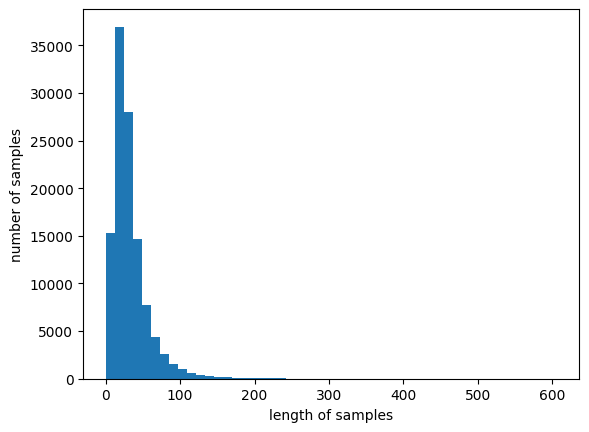

In [22]:
print('transcript의 최대 길이 :',max(len(x) for x in tok_df['transcript']))
print('transcript의 평균 길이 :',sum(map(len, tok_df['transcript']))/len(tok_df['transcript']))

plt.hist([len(x) for x in tok_df['transcript']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


최대 길이는 606, 평균 길이는 32

그래프 상에서 100 이하인 데이터 비율 출력

In [23]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [24]:
max_len = 100
below_threshold_len(max_len, tok_df['transcript'])

전체 샘플 중 길이가 100 이하인 샘플의 비율: 97.5053375800637


2000 이하인 샘플 수가 99% 이상임.
샘플 패딩 길이를 2000으로 설정

In [25]:
tok_col= pad_sequences (list(tok_col), maxlen=max_len)
tok_col


array([[  0,   0,   0, ...,   7,  90,  38],
       [  0,   0,   0, ...,   4,   3,  38],
       [  0,   0,   0, ...,  45, 132,  46],
       ...,
       [  0,   0,   0, ...,  25,   2,  38],
       [  0,   0,   0, ...,  93, 558, 205],
       [  0,   0,   0, ...,   2,   8,  22]], dtype=int32)

In [26]:
tok_df['transcript'] = list(tok_col)
tok_df[:3]

,transcript,label,tokenized
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 지금, 법무사, 님, 두, 분,..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 네네, 지금, 뭐, 입증, 되,..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[고객, 님, 담당자, 김성, 도, 대리, 입니다, 그러, 세요]"


# LSTM으로 보이스피싱 분류하기

데이터 프레임을 훈련용과 테스트 용으로 분류

In [27]:
train_data, test_data = train_test_split(tok_df, test_size=0.2 , random_state=69)
print('훈련용 데이터 개수:', len(train_data))
print('테스트용 데이터 개수:', len(test_data))

훈련용 데이터 개수: 91427
테스트용 데이터 개수: 22857


In [28]:
train_data

,transcript,label,tokenized
26276,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[약관, 대출, 받, 을려, 니, 예전, 보다, 받, 수, 있, 는, 금액, 너무,..."
50798,"[0, 0, 0, 0, 1249, 220, 23, 46, 1249, 220, 84,...",0,"[매운, 음식, 좋, 세요, 매운, 음식, 잘, 드세요, 어릴, 매운, 걸, 진짜,..."
25799,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[마이너스, 통장, 기한, 연장, 될, 수, 있, 나요, 성함, 연락처, 확인, 부..."
35323,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[최근, 보, 신, 영화, 있, 으신, 가요, 는, 영화관, 이나, 뭐, 데, 서,..."
72518,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NaN
...,...,...,...
47508,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[내, 컴퓨터, 라는, 게, 지금, 생명, 쪽, 이랑, 관련, 돼서, 내, 집사, ..."
25015,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[외국, 살, 고, 있, 는, 딸, 한테, 송금, 할려고, 는데, 방법, 가르쳐, ..."
9818,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[안녕, 세요, 문, 드릴, 게, 있, 어서, 전화, 드렸, 어요]"
69577,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NaN


<Axes: >

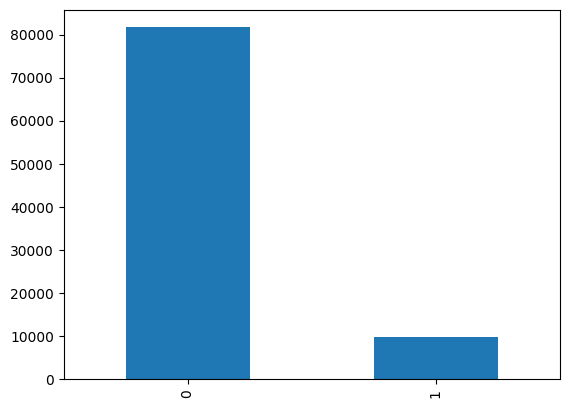

In [29]:
train_data['label'].value_counts().plot(kind = 'bar')
#test_data['label'].value_counts()

In [30]:
X_train = train_data['transcript']
y_train = train_data['label']

X_test = test_data['transcript']
y_test = test_data['label']

X_train


26276    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
50798    [0, 0, 0, 0, 1249, 220, 23, 46, 1249, 220, 84,...
25799    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
35323    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
72518    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
47508    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
25015    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9818     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
69577    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
64566    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: transcript, Length: 91427, dtype: object

In [31]:
def convert_sequences_to_float32(sequences):
    """
    시퀀스의 각 요소를 float32로 변환하는 함수

    Parameters:
    - sequences: 리스트의 리스트. 내부 리스트는 숫자로 이루어진 시퀀스를 포함한다.

    Returns:
    - 변환된 시퀀스: 각 내부 리스트의 요소가 float32 타입으로 변환된 새로운 리스트의 리스트
    """
    # 결과를 저장할 빈 리스트 초기화
    float32_sequences = []

    # 외부 리스트를 반복
    for seq in sequences:
        # 내부 리스트의 각 요소를 float32로 변환하여 새로운 리스트 생성
        float32_seq = [float(x) for x in seq]
        # 변환된 리스트를 결과 리스트에 추가
        float32_sequences.append(float32_seq)

    return float32_sequences

In [32]:
X_train = convert_sequences_to_float32(X_train)
y_train = y_train.astype(np.float32)

X_test = convert_sequences_to_float32(X_test)
y_test = y_test.astype(np.float32)


# 모델 학습

In [33]:
import re
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Dense, LSTM , Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 30
hidden_units = 128

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dropout(0.5))  # LSTM 레이어 이후에 드랍아웃 적용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, callbacks=[es, mc], batch_size=512, validation_split=0.4, verbose=1)


Epoch 1/5
108/108 [==============================] - ETA: 0s - loss: 0.3337 - acc: 0.8951
Epoch 1: val_acc improved from -inf to 0.93648, saving model to best_model.h5
108/108 [==============================] - 68s 620ms/step - loss: 0.3337 - acc: 0.8951 - val_loss: 0.2210 - val_acc: 0.9365
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


108/108 [==============================] - ETA: 0s - loss: 0.0992 - acc: 0.9660
Epoch 2: val_acc improved from 0.93648 to 0.98343, saving model to best_model.h5
108/108 [==============================] - 65s 605ms/step - loss: 0.0992 - acc: 0.9660 - val_loss: 0.0467 - val_acc: 0.9834
Epoch 3/5
108/108 [==============================] - ETA: 0s - loss: 0.0500 - acc: 0.9833
Epoch 3: val_acc improved from 0.98343 to 0.98671, saving model to best_model.h5
108/108 [==============================] - 67s 618ms/step - loss: 0.0500 - acc: 0.9833 - val_loss: 0.0356 - val_acc: 0.9867
Epoch 4/5
108/108 [==============================] - ETA: 0s - loss: 0.0320 - acc: 0.9888
Epoch 4: val_acc did not improve from 0.98671
108/108 [==============================] - 65s 605ms/step - loss: 0.0320 - acc: 0.9888 - val_loss: 0.1965 - val_acc: 0.9593
Epoch 5/5
108/108 [==============================] - ETA: 0s - loss: 0.0312 - acc: 0.9892
Epoch 5: val_acc improved from 0.98671 to 0.99046, saving model to bes

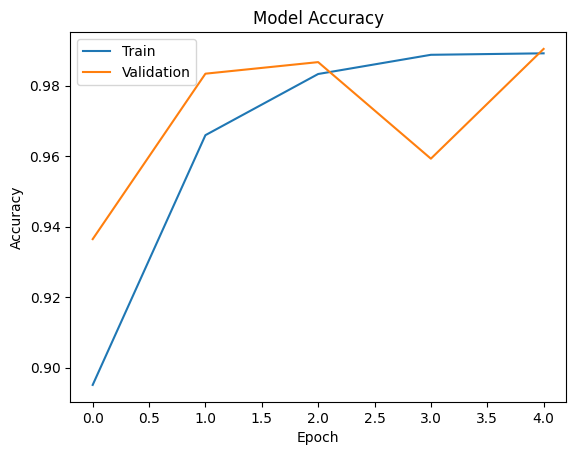

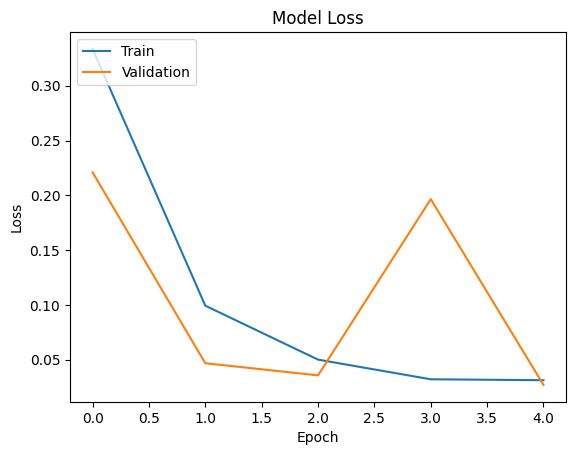

In [34]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#테스트

테스트 데이터 셋으로 테스트

In [35]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

715/715 [==============================] - 19s 25ms/step - loss: 0.0282 - acc: 0.9892
테스트 정확도: 0.9892


In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# 모델 예측
y_pred = loaded_model.predict(X_test)
y_pred = np.round(y_pred).astype(int) # 확률을 이진 값으로 변환

# F1 Score 계산
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


715/715 [==============================] - 18s 25ms/step
Precision: 0.9702, Recall: 0.9267, F1 Score: 0.9480


715/715 [==============================] - 24s 33ms/step


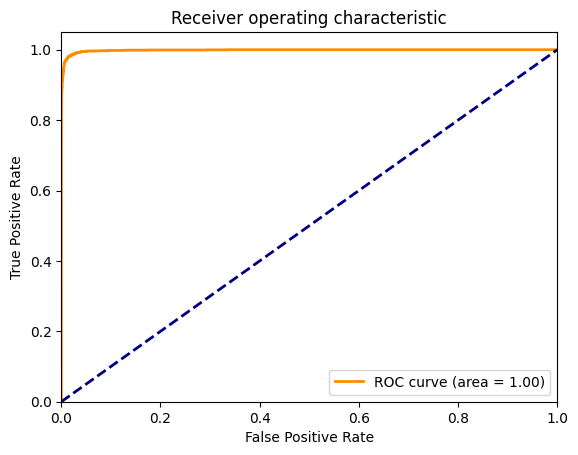

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 모델 예측
y_pred = loaded_model.predict(X_test).ravel()

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#  임의 테스트

아무말이나 입력하고 나서 그게 모델이 잘 판단하는지 테스트

In [38]:
def phishing_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  #pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  pad_new = encoded # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  print(score)
  if(score > 0.5):
    print("{:.2f}% 확률로 보이스 피싱입니다.".format((score)  * 100))
  else:
    print("{:.2f}% 확률로 보이스 피싱이 아닙니다.".format((1 - score) * 100))

In [41]:
while True:
  new_sentence = input("대화 내용을 입력해주세요(종료는'exit'입력):")
  if new_sentence == 'exit':
    break
  phishing_predict(new_sentence)

phishing_predict(input("대화 내용을 입력해주세요:"))

대화 내용을 입력해주세요(종료는'exit'입력):exit
대화 내용을 입력해주세요:'exit'


KeyError: 'pop from an empty set'